In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from datetime import datetime
from matplotlib.ticker import FixedLocator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import csv
import os

plt.rcParams['font.family'] = 'MS Gothic' #凡例やラベルに日本語を使っても文字化けしないようにする
current_date = datetime.now().strftime("%Y%m%d")

date = input("データの日付を入力してください: ")

データの日付を入力してください:  20231124


In [2]:
measurement_kind = input("マッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")  

マッキベンの種類を入力してください(4s or 4l or 6 or s or u):  4s


測定回数を入力してください(例:1):  5
データ1の圧力を入力してください:  4
データ2の圧力を入力してください:  5
データ3の圧力を入力してください:  6
データ4の圧力を入力してください:  7
データ5の圧力を入力してください:  8


Estimated Parameters (3d_ieee):
c4: -3.5797818297722177
c3: 0.24591207199353418
c2: -0.0009865232085118471
c0: 3.060918483323605


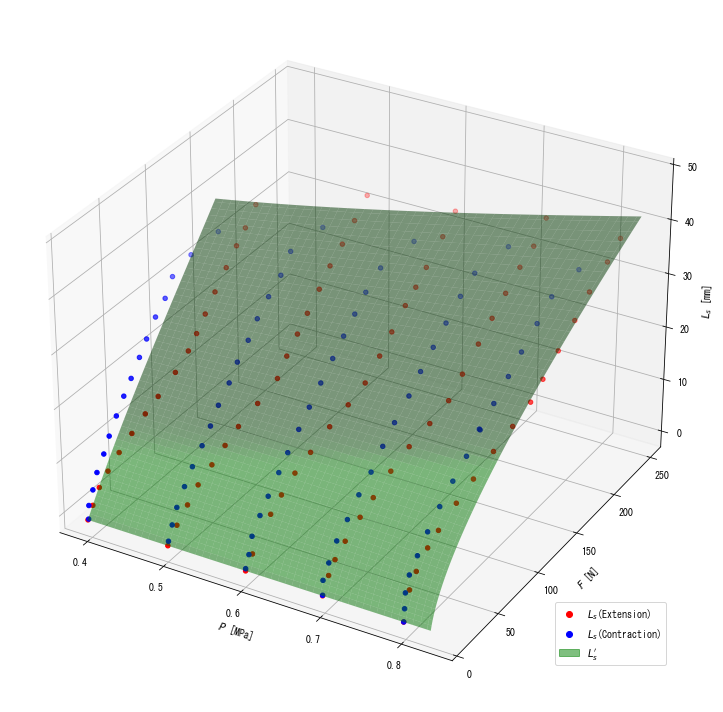

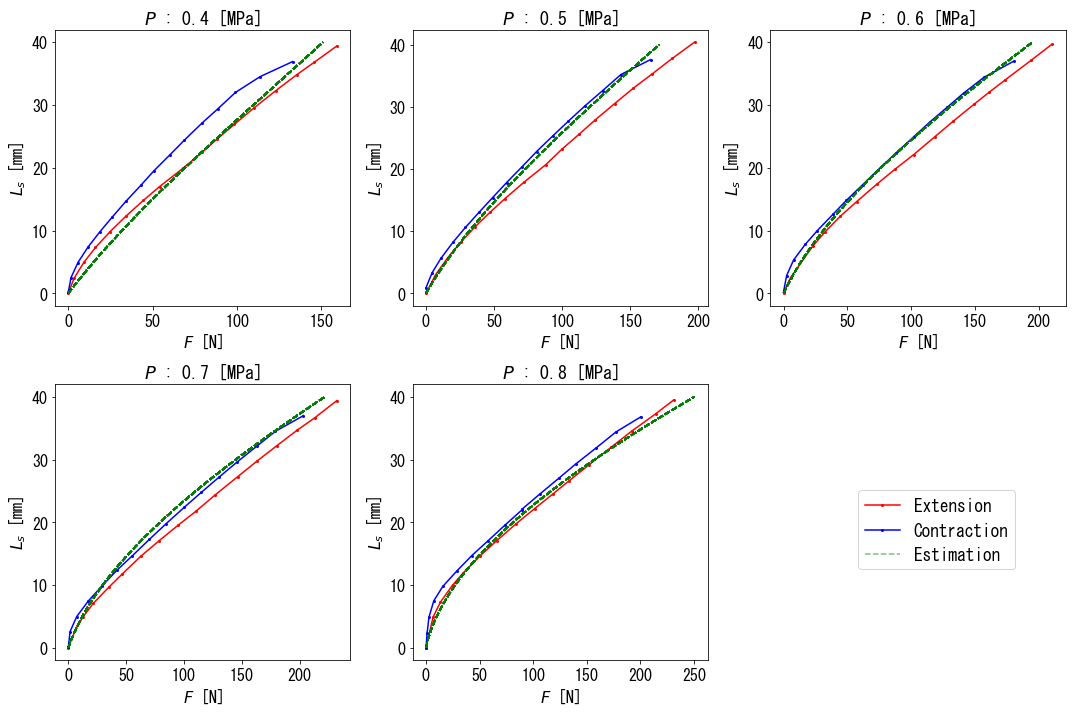

In [3]:
count = input("測定回数を入力してください(例:1): ") 

pressure1 = input("データ1の圧力を入力してください: ")
pressure2 = input("データ2の圧力を入力してください: ")
pressure3 = input("データ3の圧力を入力してください: ")
pressure4 = input("データ4の圧力を入力してください: ")
pressure5 = input("データ5の圧力を入力してください: ")

pressure_with_decimal1 = f"0.{pressure1}" 
pressure_with_decimal2 = f"0.{pressure2}" 
pressure_with_decimal3 = f"0.{pressure3}" 
pressure_with_decimal4 = f"0.{pressure4}" 
pressure_with_decimal5 = f"0.{pressure5}" 

dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_se.csv")
dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_se.csv")
dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_se.csv")
dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_se.csv")
dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_se.csv")

#dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_se.csv")
#dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_se.csv")
#dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_se.csv")
#dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_se.csv")
#dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_se.csv")

column1 = dt1[["Pressure","Length","Force"]]
column2 = dt2[["Pressure","Length","Force"]]
column3 = dt3[["Pressure","Length","Force"]]
column4 = dt4[["Pressure","Length","Force"]]
column5 = dt5[["Pressure","Length","Force"]]

combined_column = pd.concat([column1,column2,column3,column4,column5])

# 関数の定義
def calculate_F(data,c4,c3,c2,c0):
    P, L = data
    K = c4 * P**3 + c3*P**2*L + c2 *P* L**2 + c0
    F = K * L
    return F

# 関数の定義
def calculate_K(P, L,c4,c3,c2,c0):
    K = c4 * P**3 + c3*P**2*L + c2 *P* L**2 + c0
    return K 

# パラメータの初期値
initial_guess = [1.0,1.0, 1.0, 1.0]

merged_column = pd.concat([column1, column2, column3, column4, column5], ignore_index=True)
pressure_values = merged_column["Pressure"].values
length_values = merged_column["Length"].values
force_values = merged_column["Force"].values

# 最小二乗法によるフィッティング
params_g, covariance_g = curve_fit(calculate_F, (pressure_values,length_values), force_values, p0=initial_guess)


# 推定されたパラメータ

c4_g,c3_g,c2_g,c0_g = params_g


print(f"Estimated Parameters (3d_ieee):")
print(f"c4: {c4_g}")
print(f"c3: {c3_g}")
print(f"c2: {c2_g}")
print(f"c0: {c0_g}")


# 3D散布図
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

dt_list = [column1, column2, column3, column4, column5]

for i, column in enumerate(dt_list):
    pressure_values = column["Pressure"].values
    length_values = column["Length"].values
    force_values = column["Force"].values

    # Forceが最大値を取るまでの範囲を赤でプロット
    idx_max_force = column["Force"].idxmax()
    ax.scatter(pressure_values[:idx_max_force + 1], force_values[:idx_max_force + 1], length_values[:idx_max_force + 1], c='r', marker='o', label=f'$L_s$(Extension {i+1})')

    # Forceが最大値を取った後の範囲を青でプロット
    ax.scatter(pressure_values[idx_max_force + 1:], force_values[idx_max_force + 1:], length_values[idx_max_force + 1:], c='b', marker='o', label=f'$L_s$(Contraction {i+1})')

ax.set_xlabel('$P$ [MPa]')
ax.set_ylabel('$F$ [N]')
ax.set_zlabel('$L_s$ [mm]')

merged_column = pd.concat([column1, column2, column3, column4, column5], ignore_index=True)
pressure_values = merged_column["Pressure"].values
length_values = merged_column["Length"].values
force_values = merged_column["Force"].values

# フィッティングした平面
P_plane, L_plane = np.meshgrid(np.linspace(min(pressure_values), max(pressure_values), 100), np.linspace(0, 40, 100))
F_plane = calculate_F((P_plane, L_plane), c4_g,c3_g,c2_g,c0_g)
plane = ax.plot_surface(P_plane, F_plane, L_plane, color='g', alpha=0.5, label='$L_s^{\prime}$')

# # 0.3から0.9まで0.1刻みの目盛りを設定
# ax.set_xticks([0.4, 0.5, 0.6,0.7,0.8])

# 0.3から0.9までの範囲にx軸のグリッドを表示
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

# メモリの位置を調整
ax.xaxis.set_major_locator(MultipleLocator(0.1))

ax.set_xlabel('$P$ [MPa]')
ax.set_zlabel('$L_s$ [mm]')
ax.set_ylabel('$F$ [N]')
ax.set_ylim([0, max(F_plane.flatten())])
# L_s軸の目盛を10ごとに設定
ax.set_zticks(np.arange(0, max(length_values) + 10, 10))


# 各データセットの凡例を表示

legend_elements = [Line2D([0], [0], color='r', marker='o', linestyle='',label='$L_s$(Extension)'),
                   Line2D([0], [0], color='b', marker='o', linestyle='',label='$L_s$(Contraction)'),
                   Patch(color='g', alpha=0.5, label='$L_s^{\prime}$')]
ax.legend(handles=legend_elements, loc='lower right',bbox_to_anchor=(0.95, 0.05))




plt.tight_layout()


#以下2D

# 各データフレームの圧力を凡例用に取得
pressure1 = column1["Pressure"].iloc[0]
pressure2 = column2["Pressure"].iloc[0]
pressure3 = column3["Pressure"].iloc[0]
pressure4 = column4["Pressure"].iloc[0]
pressure5 = column5["Pressure"].iloc[0]

# サブプロットの設定
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 各データをプロット
dt_list = [column1, column2, column3, column4, column5]
for i, ax in enumerate(axes.flat):
    if i < len(dt_list):
        column = dt_list[i]
        
        # 最初のPressureデータを取得して四捨五入
        first_pressure = round(column["Pressure"].iloc[0], 2) 
        
        # Forceが最大値を取るまでの範囲を赤でプロット
        ax.plot(column["Force"][:column["Force"].idxmax() + 1], column["Length"][:column["Force"].idxmax() + 1], c='r', marker='o', markersize=2)

        # Forceが最大値を取った後の範囲を青でプロット
        ax.plot( column["Force"][column["Force"].idxmax() + 1:],column["Length"][column["Force"].idxmax() + 1:], c='b', marker='o', markersize=2)

        ax.set_ylabel('$L_s$ [mm]', fontsize=16)
        ax.set_xlabel('$F$ [N]', fontsize=16)
        ax.set_title(f'$P$ : {first_pressure} [MPa]'.format(int(column["Pressure"].iloc[0])), fontsize=18)
        
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        P_plane, L_plane = np.meshgrid(np.linspace(float(min([first_pressure])), float(max([first_pressure])), 100), np.linspace(0, 40, 100))
        F_plane = calculate_F((P_plane, L_plane), c4_g,c3_g,c2_g,c0_g)
        plane = ax.plot(F_plane, L_plane,  linestyle='--',color='g', alpha=0.5, label='$L_s^{\prime}$')
        
    else:
        ax.axis('off')
        
# 凡例を追加
fig.legend(labels=['Extension', 'Contraction','Estimation'], loc=(0.8,0.2), fontsize='xx-large')

plt.tight_layout()
# save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\multi_se_Ls_3d_ieeesensors\\{date}_{count}_{measurement_kind}_3d_ieeesensors.jpg'
# #save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\\K_fit\\contraction\\K_fit_{date}_{count}_{measurement_kind}_c.jpg'
# plt.savefig(save_path,bbox_inches='tight')



csv_file_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_parameter_3d_ieeesensors\\{date}_{count}_{measurement_kind}_3d_ieeesensors(4).csv'

# 推定されたパラメータをCSVファイルに保存
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Parameter', 'Value']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # 全体の最小二乗法で推定されたパラメータ保存
    writer.writerow({'Parameter': 'c4', 'Value': c4_g})
    writer.writerow({'Parameter': 'c3', 'Value': c3_g})
    writer.writerow({'Parameter': 'c2', 'Value': c2_g})
    writer.writerow({'Parameter': 'c0', 'Value': c0_g})

In [4]:
# 